In [ ]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 25.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
ruu19 = pd.read_excel('/work/Output/CombineMainAndLink/RUU2019Combine.xlsx')
ruu24 = pd.read_excel('/work/Output/CombineMainAndLink/RUU2024Combine.xlsx')
partai = pd.read_csv('/work/partai-indonesia.csv',sep=";")

In [ ]:
ruu19['sponsor_dpr'] = ruu19['Sponsor'].str.contains('DPR')==True
ruu19['sponsor_dpr'] = ruu19['sponsor_dpr'].astype(int)
ruu19['sponsor_pemerintah'] = ruu19['Sponsor'].str.contains('Pemerintah')==True
ruu19['sponsor_pemerintah'] = ruu19['sponsor_pemerintah'].astype(int)
ruu19['sponsor_dpd'] = ruu19['Sponsor'].str.contains('DPD')==True
ruu19['sponsor_dpd'] = ruu19['sponsor_dpd'].astype(int)
ruu19['goal'] = ruu19['Status']=='Selesai'
ruu19['goal'] = ruu19['goal'].astype(int)
# ruu19['is_oposisi'] = 1
ruu19['prioritas'] = ruu19['Prioritas']=='Ya'
ruu19['prioritas'] = ruu19['prioritas'].astype(int)
for i in np.unique(','.join(ruu24['Pengusul'].append(ruu19['Pengusul']).unique().astype('str')).split(',')):
    if(i=='nan'):
        continue
    ruu19.insert(loc=len(ruu19.columns),column='pengusul_'+i,value=ruu19['Pengusul'].str.contains(i)==True)
    ruu19['pengusul_'+i] = ruu19['pengusul_'+i].astype(int)
for i in np.unique(','.join(ruu24['Penugasan'].append(ruu19['Penugasan']).unique().astype('str')).split(',')):
    if(i=='nan'):
        continue
    ruu19.insert(loc=len(ruu19.columns),column='penugasan_'+i,value=ruu19['Penugasan'].str.contains(i)==True)
    ruu19['penugasan_'+i] = ruu19['penugasan_'+i].astype(int)
# for i in range(0,len(ruu19)):
#     if(type(ruu19.loc[i,'Pengusul'])==float):
#         continue
#     for j in ruu19.loc[i,'Pengusul'].split(','):
#         if(partai.loc[(partai['Tahun']==2014) & (partai['Status']=='Dalam Pemerintah')]['Partai'].str.contains(j).any()):
#             ruu19.loc[i,'is_oposisi'] = 0
#             break



ruu24['sponsor_dpr'] = ruu24['Sponsor'].str.contains('DPR')==True
ruu24['sponsor_dpr'] = ruu24['sponsor_dpr'].astype(int)
ruu24['sponsor_pemerintah'] = ruu24['Sponsor'].str.contains('Pemerintah')==True
ruu24['sponsor_pemerintah'] = ruu24['sponsor_pemerintah'].astype(int)
ruu24['sponsor_dpd'] = ruu24['Sponsor'].str.contains('DPD')==True
ruu24['sponsor_dpd'] = ruu24['sponsor_dpd'].astype(int)
ruu24['goal'] = ruu24['Status']=='Selesai'
ruu24['goal'] = ruu24['goal'].astype(int)
# ruu24['is_oposisi'] = 1
ruu24['prioritas'] = ruu24['Prioritas']=='Ya'
ruu24['prioritas'] = ruu24['prioritas'].astype(int)
for i in np.unique(','.join(ruu24['Pengusul'].append(ruu19['Pengusul']).unique().astype('str')).split(',')):
    if(i=='nan'):
        continue
    ruu24.insert(loc=len(ruu24.columns),column='pengusul_'+i,value=ruu24['Pengusul'].str.contains(i)==True)
    ruu24['pengusul_'+i] = ruu24['pengusul_'+i].astype(int)
for i in np.unique(','.join(ruu24['Penugasan'].append(ruu19['Penugasan']).unique().astype('str')).split(',')):
    if(i=='nan'):
        continue
    ruu24.insert(loc=len(ruu24.columns),column='penugasan_'+i,value=ruu24['Penugasan'].str.contains(i)==True)
    ruu24['penugasan_'+i] = ruu24['penugasan_'+i].astype(int)
# for i in range(0,len(ruu19)):
#     if(type(ruu24.loc[i,'Pengusul'])==float):
#         continue
#     for j in ruu24.loc[i,'Pengusul'].split(','):
#         if(partai.loc[(partai['Tahun']==2019) & (partai['Status']=='Dalam Pemerintah')]['Partai'].str.contains(j).any()):
#             ruu24.loc[i,'is_oposisi'] = 0
#             break

ruu19 = ruu19.drop(['Unnamed: 0','Tanggal Diusul','Tanggal Diupdate','Status','Sponsor','Pengusul','Penugasan','Prioritas','Tahun Prioritas'], axis=1)
ruu24 = ruu24.drop(['Unnamed: 0','Tanggal Diusul','Tanggal Diupdate','Status','Sponsor','Pengusul','Penugasan','Prioritas','Tahun Prioritas'], axis=1)
ruu19 = ruu19.set_index('Judul Ruu')
ruu24 = ruu24.set_index('Judul Ruu')

In [ ]:
ruu19_not_goal = ruu19.loc[ruu19['goal']==1]
ruu19_goal = ruu19.loc[ruu19['goal']==0].sample(n=24,random_state=42)

In [ ]:
ruu19_pretrained = pd.concat([ruu19_goal, ruu19_not_goal])

In [ ]:
ruu19_pretrained_x = ruu19_pretrained.loc[:, ['prioritas','pengusul_Kementerian Hukum dan HAM','penugasan_Komisi I','sponsor_dpr','pengusul_Kementerian BUMN','penugasan_Panitia Khusus','pengusul_Komisi Hukum Nasional','sponsor_dpd']]
ruu19_pretrained_y = ruu19_pretrained.loc[:, ruu19_pretrained.columns == 'goal']


In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(ruu19_pretrained_x, ruu19_pretrained_y)

/tmp/ipykernel_81/3348025058.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(ruu19_pretrained_x, ruu19_pretrained_y)


RandomForestRegressor()

<BarContainer object of 8 artists>

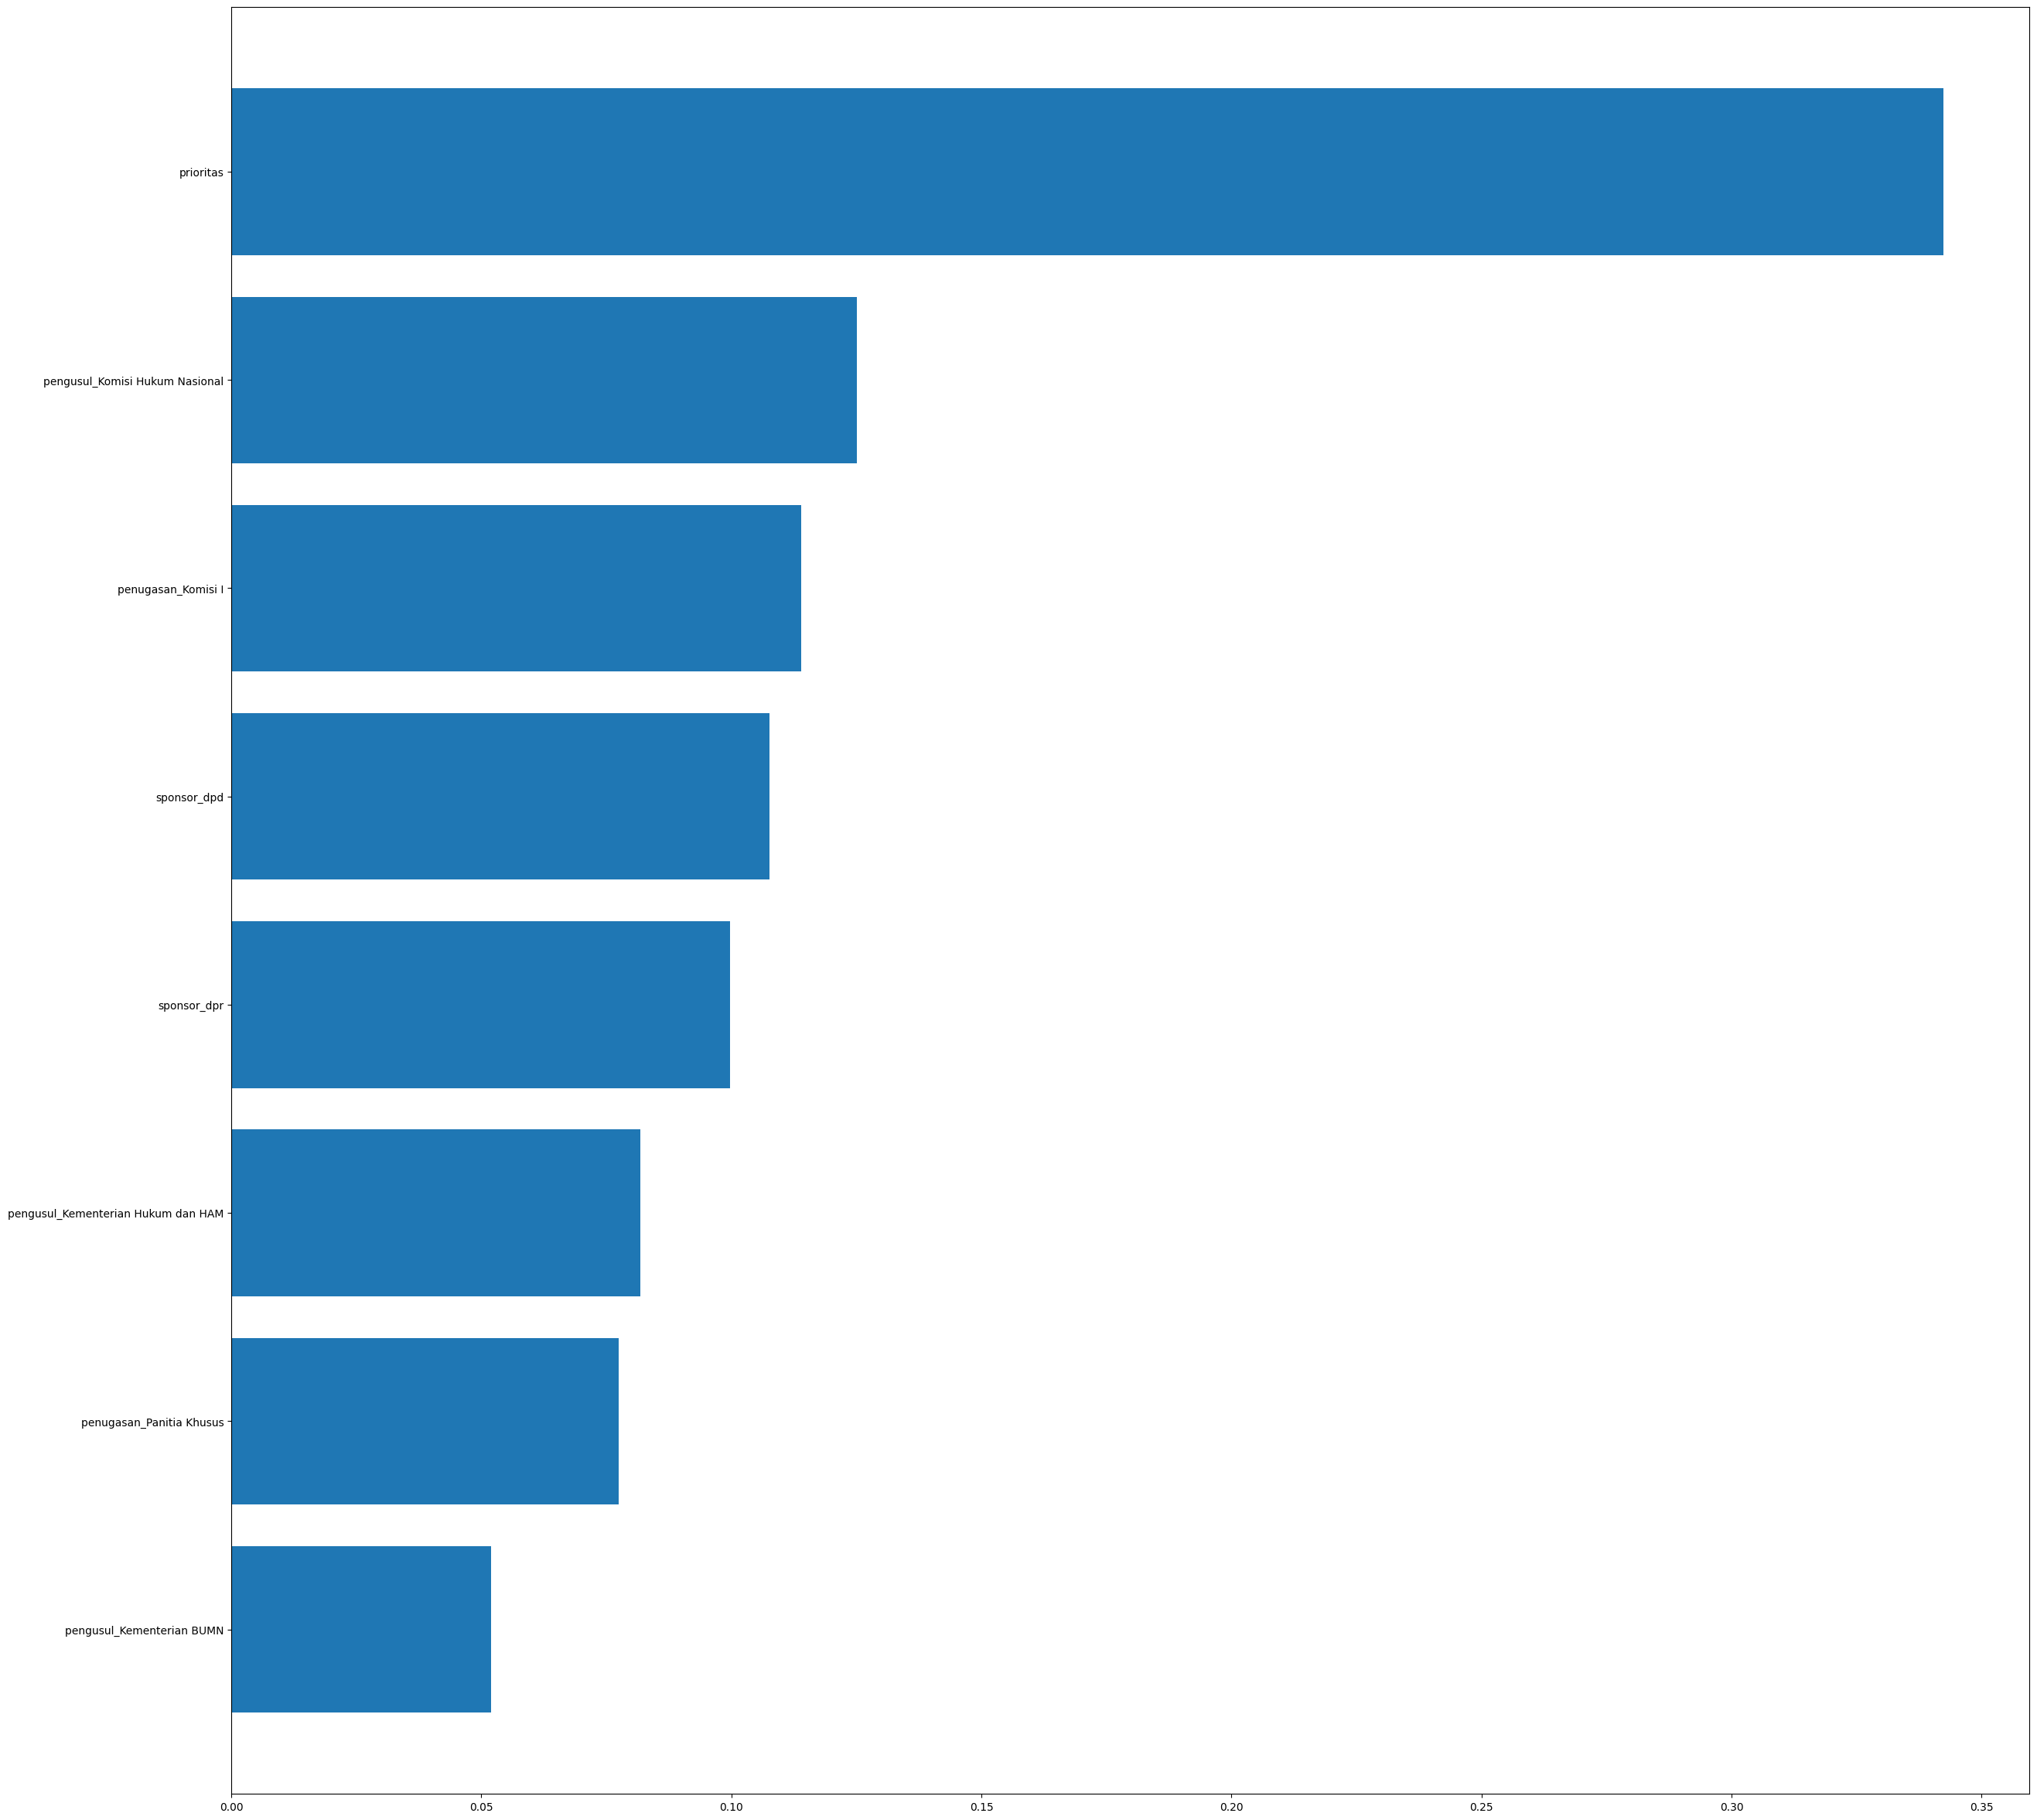

In [ ]:
plt.figure(figsize=(30,30))
feature = pd.DataFrame({'feature':ruu19_pretrained_x.columns,'importance':rf.feature_importances_})
plt.barh(feature.sort_values('importance')['feature'], feature.sort_values('importance')['importance'],height=0.8)

In [ ]:

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(rf.estimators_[2],feature_names = ['prioritas','pengusul_Kementerian Hukum dan HAM','penugasan_Komisi I','sponsor_dpr','pengusul_Kementerian BUMN','penugasan_Panitia Khusus','pengusul_Komisi Hukum Nasional','sponsor_dpd'], out_file='tree.dot')

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
test = ruu24.loc[ruu24['goal']==1]

In [ ]:
result = rf.predict(ruu24.loc[:, ['prioritas','pengusul_Kementerian Hukum dan HAM','penugasan_Komisi I','sponsor_dpr','pengusul_Kementerian BUMN','penugasan_Panitia Khusus','pengusul_Komisi Hukum Nasional','sponsor_dpd']])

In [ ]:
result = (result>0.5).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(ruu24.loc[:,ruu24.columns == 'goal'],result))
print(classification_report(ruu24.loc[:,ruu24.columns == 'goal'],result))
print(accuracy_score(ruu24.loc[:,ruu24.columns == 'goal'], result))

[[200  39]
 [  7  10]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       239
           1       0.20      0.59      0.30        17

    accuracy                           0.82       256
   macro avg       0.59      0.71      0.60       256
weighted avg       0.92      0.82      0.86       256

0.8203125


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=45b28f99-d503-49a3-bd9e-f98821f9fde8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>